# Multiclass Image Classification

* Create Data with 10 Image Classification
* Visualize Data
* Preprocess the Data
* Create the Model
* Fit the Model
* Evaluate the Model
* Adjust Hyperparams to improve performance

In [1]:
CLASS_NAMES = ['samosa','pizza','bread_pudding','caesar_salad',
               'chicken_curry','chicken_wings','donuts','fried_rice','ice_cream','waffles']
len(CLASS_NAMES)

10

## Create Data with 10 Image Classification

In [2]:
import os
import json
import shutil
from tqdm import tqdm

class PrepareData:
    
    def __init__(self, classnames):
        self.classnames = classnames
        self.IMAGES_DIR    = 'images'
        self.TRAIN_DIR     = 'train'
        self.TEST_DIR      = 'test'
        self.META_DIR      = 'meta'
        self.DIR_SEPARATOR = '/'
        self.IMAGE_TYPE    = '.jpg'
        
    def create_10_food_classes(self,src_root,destination_root):
        '''
        create all required directories
        '''
        self.create_required_dir()
        keys = json.load(open(src_root + self.DIR_SEPARATOR + self.META_DIR + self.DIR_SEPARATOR + self.TRAIN_DIR + '.json'))
        # copy train data
        for label in tqdm(self.classnames):
            images_for_label = keys[label]
            print(f'no of images for label {label} is {len(images_for_label)}')
            for img in images_for_label:
                src_path = src_root + self.DIR_SEPARATOR + self.IMAGES_DIR + self.DIR_SEPARATOR + img + self.IMAGE_TYPE
                destination_path = destination_root + self.DIR_SEPARATOR + self.TRAIN_DIR + self.DIR_SEPARATOR + img + self.IMAGE_TYPE
                if os.path.exists(destination_path) == False:
                    shutil.copy(src_path,destination_path)
        # copy test data
        keys = json.load(open(src_root + self.DIR_SEPARATOR + self.META_DIR + self.DIR_SEPARATOR + self.TEST_DIR + '.json'))
        for label in tqdm(self.classnames):
            images_for_label = keys[label]
            print(f'no of images for label {label} is {len(images_for_label)}')
            for img in images_for_label:
                src_path = src_root + self.DIR_SEPARATOR + self.IMAGES_DIR + self.DIR_SEPARATOR + img + self.IMAGE_TYPE
                destination_path = destination_root + self.DIR_SEPARATOR + self.TEST_DIR + self.DIR_SEPARATOR + img + self.IMAGE_TYPE
                if os.path.exists(destination_path) == False:
                    shutil.copy(src_path,destination_path)

    def create_required_dir(self):
        '''
        checks if the all requirements are met...
        '''
        print('checking if required directories are present...')
        train_dir = '10-food-classes/train/'
        test_dir  = '10-food-classes/test/'
        for product in self.classnames:
            train_path = train_dir + '/' + product + '/'
            test_path  = test_dir + '/' + product + '/'
            train_exists = os.path.exists(train_path)
            test_exists  = os.path.exists(test_path)
            if train_exists == False:
                os.makedirs(train_path)
                print(f'creating train directory {os.path.exists(train_path)}')
            if test_exists == False:
                os.makedirs(test_path)
                print(f'creating test directory {os.path.exists(test_path)}')
        print('all seems good...')

In [3]:
p = PrepareData(CLASS_NAMES)
SRC_ROOT = 'food-101'
DESTINATION_ROOT = '10-food-classes'
p.create_10_food_classes(SRC_ROOT,DESTINATION_ROOT)

checking if required directories are present...
all seems good...


 30%|███       | 3/10 [00:00<00:00, 25.12it/s]

no of images for label samosa is 750
no of images for label pizza is 750
no of images for label bread_pudding is 750
no of images for label caesar_salad is 750
no of images for label chicken_curry is 750
no of images for label chicken_wings is 750


 60%|██████    | 6/10 [00:00<00:00, 25.62it/s]

no of images for label donuts is 750
no of images for label fried_rice is 750
no of images for label ice_cream is 750


100%|██████████| 10/10 [00:00<00:00, 24.80it/s]


no of images for label waffles is 750


  0%|          | 0/10 [00:00<?, ?it/s]

no of images for label samosa is 250
no of images for label pizza is 250


100%|██████████| 10/10 [00:00<00:00, 73.54it/s]

no of images for label bread_pudding is 250
no of images for label caesar_salad is 250
no of images for label chicken_curry is 250
no of images for label chicken_wings is 250
no of images for label donuts is 250
no of images for label fried_rice is 250
no of images for label ice_cream is 250
no of images for label waffles is 250


## Visualize Data

In [4]:
import os
from PIL import Image
import random
import matplotlib.pyplot as plt

def show_10_class_images(classes,train_root):
    rows = 2
    cols = 5
    i    = 0
    sep  = '/'
    train = 'train'
    size  = (224,224)
    
    fig,axes = plt.subplots(rows,cols,figsize=(10,7))
    
    for row in range(rows):
        for col in range(cols):
            label = classes[i]
            random_img = random.choice(os.listdir(train_root + sep + train + sep + label + sep))
            img = Image.open(train_root + sep + train + sep + label + sep + random_img)
            img = img.resize(size)
            #img = plt.imread(train_root + sep + train + sep + label + sep + random_img)
            axes[row][col].imshow(img)
            axes[row][col].set_title(label)
            i = i + 1

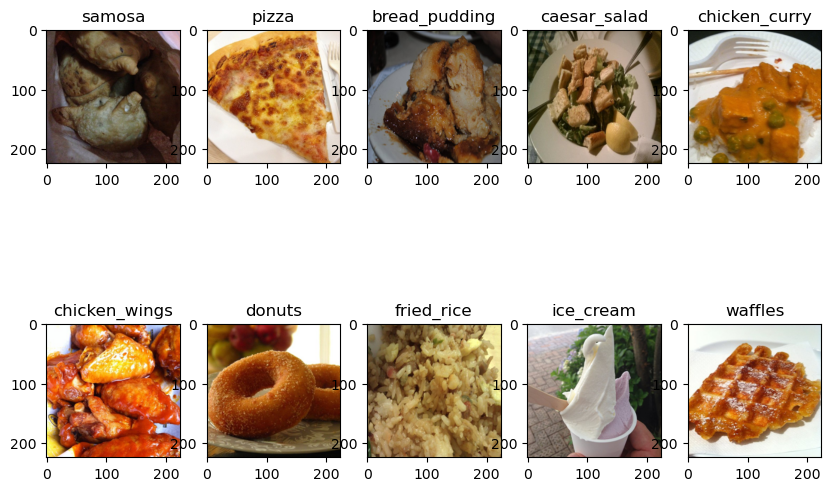

In [5]:
ROOT_DIR = '10-food-classes/'
show_10_class_images(CLASS_NAMES,ROOT_DIR)

## Build the model

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

class MulticlassClassification:
    def __init__(self,root_dir):
        print(f'creating multiclass classification model')
        self.ROOT_DIR = root_dir
        self.NAME = 'MulticlassClassification'
        self.DIR_SEP = '/'
        self.TRAIN_DIR = self.ROOT_DIR + self.DIR_SEP + 'train/'
        self.TEST_DIR = self.ROOT_DIR + self.DIR_SEP + 'test/'
        self.RESCALE  = 1./255
        self.DATA_AUGMENT  = 0.2
        self.IMG_WIDTH = 64
        self.IMG_SIZE = (self.IMG_WIDTH,self.IMG_WIDTH)
        self.MODE     = 'categorical'
        self.FILTER_SIZE = 10
        self.KERNEL_SIZE = (3,3)
        self.RELU = 'relu'
        self.SOFTMAX = 'softmax'
        self.ISHAPE = (self.IMG_WIDTH,self.IMG_WIDTH,3)
        self.EPOCHS = 5
    
    def build_data(self):
        self.train_data_gen = ImageDataGenerator(rescale=self.RESCALE,
                                                rotation_range=self.DATA_AUGMENT,
                                                shear_range=self.DATA_AUGMENT,
                                                zoom_range=self.DATA_AUGMENT,
                                                width_shift_range=self.DATA_AUGMENT,
                                                height_shift_range=self.DATA_AUGMENT,
                                                horizontal_flip=True)
        self.test_data_gen  = ImageDataGenerator(rescale=self.RESCALE)
        self.train_data     = self.train_data_gen.flow_from_directory(directory=self.TRAIN_DIR,
                                                                     target_size=self.IMG_SIZE,
                                                                     class_mode= self.MODE)
        self.test_data      = self.test_data_gen.flow_from_directory(directory=self.TEST_DIR,
                                                                    target_size=self.IMG_SIZE,
                                                                    class_mode=self.MODE)
    
    def create_model(self):
        self.model = Sequential([
            Conv2D(filters=self.FILTER_SIZE,
                  kernel_size=self.KERNEL_SIZE,
                  activation=self.RELU,
                  input_shape=self.ISHAPE),
            Conv2D(filters=self.FILTER_SIZE,kernel_size=self.KERNEL_SIZE,activation=self.RELU),
            MaxPool2D(),
            Conv2D(filters=self.FILTER_SIZE,kernel_size=self.KERNEL_SIZE,activation=self.RELU),
            Conv2D(filters=self.FILTER_SIZE,kernel_size=self.KERNEL_SIZE,activation=self.RELU),
            MaxPool2D(),
            Flatten(),
            Dense(10,activation=self.SOFTMAX)
            
        ],name=self.NAME)
        # compile the model
        self.model.compile(loss=CategoricalCrossentropy(),
                          optimizer=Adam(),
                          metrics=['accuracy'])
        # print the summary
        self.model.summary()
        return self.model
    
    def fit_model(self):
        self.history = self.model.fit(self.train_data,
                                     epochs=self.EPOCHS,
                                     steps_per_epoch=len(self.train_data),
                                     validation_data=self.test_data,
                                     validation_steps=len(self.test_data))
        return self.history
    
    def evaluate(self):
       return self.model.evaluate(self.test_data)

    def get_test_data(self):
        return self.test_data
    
    def plot_loss_and_accuracy_curves(self,history):
        fig,ax = plt.subplots(1,2,figsize=(10, 7))
        i = 0
        ax[i].plot(history.history['loss'])
        ax[i].plot(history.history['val_loss'])
        ax[i].set_title('training v/s validation loss')
        ax[i].set(xlabel='epochs', ylabel='loss')
        ax[i].legend(['train data','test data'])
        i = 1
        ax[i].plot(history.history['accuracy'])
        ax[i].plot(history.history['val_accuracy'])
        ax[i].set_title('training v/s validation accuracy')
        ax[i].set(xlabel='epochs', ylabel='accuracy')
        ax[i].legend(['train data','test data'])

creating multiclass classification model
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Model: "MulticlassClassification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 10)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 10)        910       
                                               

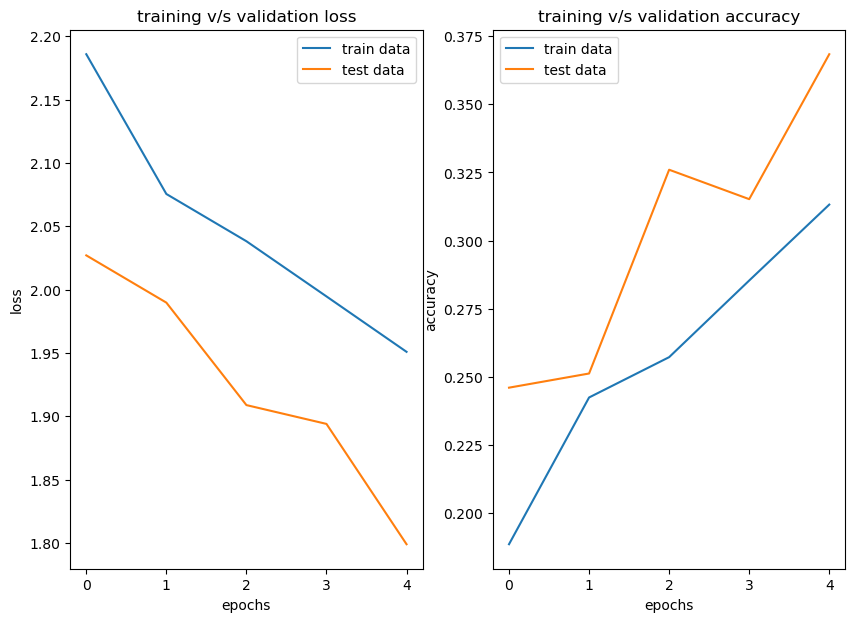

In [7]:
ROOT_DIR = '10-food-classes/'
classification = MulticlassClassification(root_dir=ROOT_DIR)
classification.build_data()
model = classification.create_model()
history = classification.fit_model()
classification.plot_loss_and_accuracy_curves(history)

## Evaluate the model

In [8]:
classification.evaluate()

79/79 [==============================] - 21s 268ms/step - loss: 1.7989 - accuracy: 0.3684


[1.7989379167556763, 0.3684000074863434]

## Make Prediction on custom model

In [9]:
def load_and_prep_image(filename,image_shape=64):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size=[image_shape,image_shape])
    img = img/255.
    return img

def pred_and_plot(model,filename,class_names):
    img_o = load_and_prep_image(filename)
    img = tf.expand_dims(img_o,axis=0)
    print(img.shape)
    pred = model.predict(img)
    print(pred)
    if len(pred[0]) > 1:
        print('multiclass output')
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]
    #pred = tf.round(pred[0][0]).numpy()
    #pred = int(pred)
    #pred_label = class_names[pred]
    plt.imshow(img_o)
    plt.title(f'Prediction: {pred_class}')

(1, 64, 64, 3)
1/1 [==============================] - 0s 204ms/step
[[0.06944849 0.12756035 0.12234603 0.11702542 0.10134951 0.08693367
  0.04739349 0.04765256 0.14819354 0.13209693]]
multiclass output


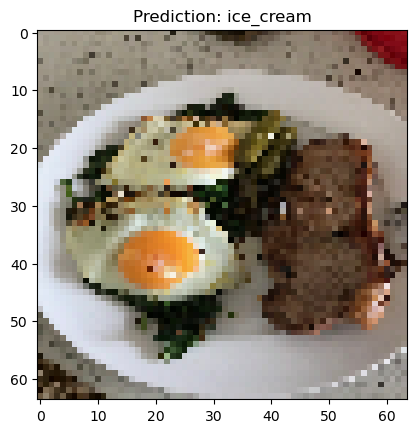

In [10]:
pred_and_plot(model,'03-steak.jpeg',CLASS_NAMES)

(1, 64, 64, 3)
1/1 [==============================] - 0s 37ms/step
[[0.0294105  0.05869559 0.05932575 0.11873586 0.15500078 0.13683957
  0.07520919 0.18712658 0.03140341 0.14825274]]
multiclass output


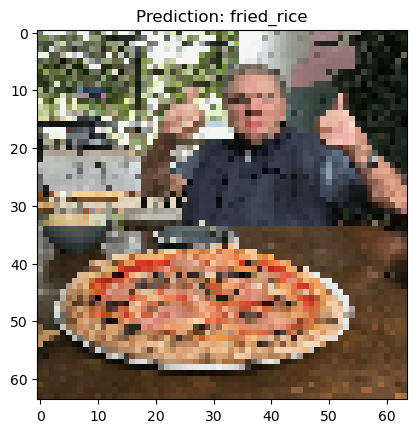

In [11]:
pred_and_plot(model,'03-pizza-dad.jpeg',CLASS_NAMES)

## Save and Load Model

In [12]:
model.save('saved_trained_model_multiclass_classification')

INFO:tensorflow:Assets written to: saved_trained_model_multiclass_classification\assets


INFO:tensorflow:Assets written to: saved_trained_model_multiclass_classification\assets


## Load Model

In [13]:
loaded_model = tf.keras.models.load_model('saved_trained_model_multiclass_classification/')
loaded_model.evaluate(classification.get_test_data())

79/79 [==============================] - 21s 261ms/step - loss: 1.7989 - accuracy: 0.3684


[1.7989379167556763, 0.3684000074863434]